In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [31]:
data = pd.read_excel("C:/Users/micha/Downloads/Office_Supply_Campaign_ResultS_7-23-19.xlsx")
print(data.tail())

       Customer Number  Campaign Period Sales  Historical Sales Volume  \
16168      167014041.0                    0.0             2.558801e+06   
16169      167077817.0                    0.0             2.355030e+06   
16170      167089540.0                    0.0             5.845700e+05   
16171      167235933.0                    0.0             1.949425e+06   
16172              NaN                    NaN                      NaN   

      Date of First Purchase  Number of Prior Year Transactions  \
16168             1994-06-01                                7.0   
16169             1995-01-01                                6.0   
16170             1996-02-01                                2.0   
16171             1998-03-15                                4.0   
16172                    NaT                                NaN   

       Do Not Direct Mail Solicit  Do Not Email  Do Not Telemarket  \
16168                         0.0           0.0                0.0   
16169       

In [32]:
data.dtypes

Customer Number                             float64
Campaign Period Sales                       float64
Historical Sales Volume                     float64
Date of First Purchase               datetime64[ns]
Number of Prior Year Transactions           float64
Do Not Direct Mail Solicit                  float64
Do Not Email                                float64
Do Not Telemarket                           float64
Repurchase Method                            object
Last Transaction Channel                     object
Desk                                         object
Executive Chair                              object
Standard Chair                               object
Monitor                                      object
Printer                                      object
Computer                                     object
Insurance                                    object
Toner                                        object
Office Supplies                              object
Number of Em

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer Number                      16172 non-null float64
Campaign Period Sales                16172 non-null float64
Historical Sales Volume              16172 non-null float64
Date of First Purchase               16172 non-null datetime64[ns]
Number of Prior Year Transactions    16172 non-null float64
Do Not Direct Mail Solicit           16172 non-null float64
Do Not Email                         16172 non-null float64
Do Not Telemarket                    16172 non-null float64
Repurchase Method                    16172 non-null object
Last Transaction Channel             15730 non-null object
Desk                                 16173 non-null object
Executive Chair                      16171 non-null object
Standard Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-nul

In [34]:
data.isnull().sum()

Customer Number                         1
Campaign Period Sales                   1
Historical Sales Volume                 1
Date of First Purchase                  1
Number of Prior Year Transactions       1
Do Not Direct Mail Solicit              1
Do Not Email                            1
Do Not Telemarket                       1
Repurchase Method                       1
Last Transaction Channel              443
Desk                                    0
Executive Chair                         2
Standard Chair                          2
Monitor                                 2
Printer                                 2
Computer                                1
Insurance                               3
Toner                                   3
Office Supplies                         1
Number of Employees                     3
Language                             4472
dtype: int64

In [38]:
data['Last Transaction Channel'].value_counts()

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
missing            443
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: Last Transaction Channel, dtype: int64

In [39]:
data['Last Transaction Channel'].fillna('missing',inplace = True)
data['Last Transaction Channel'].value_counts()

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
missing            443
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: Last Transaction Channel, dtype: int64

In [40]:
data['Language'].value_counts()
data.loc[data['Language']!= 'English',["Language"]] = "Not-English"
data["Language"].fillna("missing",inplace = True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer Number                      16172 non-null float64
Campaign Period Sales                16172 non-null float64
Historical Sales Volume              16172 non-null float64
Date of First Purchase               16172 non-null datetime64[ns]
Number of Prior Year Transactions    16172 non-null float64
Do Not Direct Mail Solicit           16172 non-null float64
Do Not Email                         16172 non-null float64
Do Not Telemarket                    16172 non-null float64
Repurchase Method                    16172 non-null object
Last Transaction Channel             16173 non-null object
Desk                                 16173 non-null object
Executive Chair                      16171 non-null object
Standard Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-nul

In [42]:
data.dropna(inplace = True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16168 entries, 0 to 16171
Data columns (total 21 columns):
Customer Number                      16168 non-null float64
Campaign Period Sales                16168 non-null float64
Historical Sales Volume              16168 non-null float64
Date of First Purchase               16168 non-null datetime64[ns]
Number of Prior Year Transactions    16168 non-null float64
Do Not Direct Mail Solicit           16168 non-null float64
Do Not Email                         16168 non-null float64
Do Not Telemarket                    16168 non-null float64
Repurchase Method                    16168 non-null object
Last Transaction Channel             16168 non-null object
Desk                                 16168 non-null object
Executive Chair                      16168 non-null object
Standard Chair                       16168 non-null object
Monitor                              16168 non-null object
Printer                              16168 non-nul

In [44]:
data.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,...,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,...,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,...,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),...,N,N,N,N,N,Y,N,N,,Not-English


In [45]:
data_types = data.dtypes == "object"

In [46]:
print(data_types)

Customer Number                      False
Campaign Period Sales                False
Historical Sales Volume              False
Date of First Purchase               False
Number of Prior Year Transactions    False
Do Not Direct Mail Solicit           False
Do Not Email                         False
Do Not Telemarket                    False
Repurchase Method                     True
Last Transaction Channel              True
Desk                                  True
Executive Chair                       True
Standard Chair                        True
Monitor                               True
Printer                               True
Computer                              True
Insurance                             True
Toner                                 True
Office Supplies                       True
Number of Employees                   True
Language                              True
dtype: bool


In [47]:
obj_columns = []
for i,j in enumerate(data_types):
    if j:
        obj_columns.append(data_types.index[i])
        #print(j,(data_types.index[i]))

        

In [48]:
obj_columns

['Repurchase Method',
 'Last Transaction Channel',
 'Desk',
 'Executive Chair',
 'Standard Chair',
 'Monitor',
 'Printer',
 'Computer',
 'Insurance',
 'Toner',
 'Office Supplies',
 'Number of Employees',
 'Language']

In [49]:
dataframe_object = data.loc[:,obj_columns]


In [50]:
dataframe_object.head()

,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English
1,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
2,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English
3,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English
4,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,Not-English


In [51]:
dataframe_object["Number of Employees"].value_counts()

6-10       5230
           3744
1-5        2700
11-50      2236
51-100     1381
101-500     653
500+        224
Name: Number of Employees, dtype: int64

In [52]:
dataframe_object["Number of Employees"].value_counts().index

Index(['6-10', ' ', '1-5', '11-50', '51-100', '101-500', '500+'], dtype='object')

In [53]:
dataframe_object["Number of Employees"] = dataframe_object["Number of Employees"].map({'6-10':'small',
                                                                                       ' ':'unknown',
                                                                                       '1-5':'small',
                                                                                       '11-50':'medium',
                                                                                       '51-100':'large', 
                                                                                       '101-500':'huge', 
                                                                                       '500+':'huge'})
dataframe_object["Number of Employees"]

0          small
1         medium
2          small
3          small
4        unknown
          ...   
16167    unknown
16168    unknown
16169    unknown
16170    unknown
16171    unknown
Name: Number of Employees, Length: 16168, dtype: object

In [54]:
dataframe_object['Repurchase Method'].value_counts()

NOTICE          11901
AUTO RENEW       4266
PAYMENT PLAN        1
Name: Repurchase Method, dtype: int64

In [55]:
cols_to_dummy = ['Repurchase Method',"Last Transaction Channel"]

In [56]:
dataframe_object['Last Transaction Channel'].value_counts()

MAIL              7769
AUTO RENEW        3140
WEB               2646
PHONE             1096
BRANCH (POS)       633
missing            442
BRANCH (PHONE)     411
BILLING             17
IT                  14
Name: Last Transaction Channel, dtype: int64

In [57]:
dataframe_object["Insurance"].value_counts()

N     14237
Y      1930
YY        1
Name: Insurance, dtype: int64

In [58]:
y_no_convert = ["Desk","Computer","Insurance","Toner"]
dataframe_object.loc[:,y_no_convert]=dataframe_object[y_no_convert].replace("YY","Y")


In [59]:
dataframe_object.describe().head()

,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
count,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168
unique,3,9,2,2,2,2,2,2,2,2,2,5,2
top,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,small,English
freq,11901,7769,15257,15011,15887,15870,15742,15938,14237,15110,11801,7930,11315


In [60]:
obj_dummied= pd.get_dummies(dataframe_object,drop_first=True)

In [61]:
obj_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16168 entries, 0 to 16171
Data columns (total 24 columns):
Repurchase Method_NOTICE                   16168 non-null uint8
Repurchase Method_PAYMENT PLAN             16168 non-null uint8
Last Transaction Channel_BILLING           16168 non-null uint8
Last Transaction Channel_BRANCH (PHONE)    16168 non-null uint8
Last Transaction Channel_BRANCH (POS)      16168 non-null uint8
Last Transaction Channel_IT                16168 non-null uint8
Last Transaction Channel_MAIL              16168 non-null uint8
Last Transaction Channel_PHONE             16168 non-null uint8
Last Transaction Channel_WEB               16168 non-null uint8
Last Transaction Channel_missing           16168 non-null uint8
Desk_Y                                     16168 non-null uint8
Executive Chair_Y                          16168 non-null uint8
Standard Chair_Y                           16168 non-null uint8
Monitor_Y                                  16168 non-null u

In [30]:
data.shape

(16168, 21)

In [31]:
obj_dummied.shape

(16168, 20)

In [68]:
cols_type = data.dtypes != "object"
inds = cols_type.index
numerical_col = []
for i,col in enumerate(cols_type):
    if col:
        numerical_col.append(inds[i])

In [69]:
numerical_col

['Customer Number',
 'Campaign Period Sales',
 'Historical Sales Volume',
 'Date of First Purchase',
 'Number of Prior Year Transactions',
 'Do Not Direct Mail Solicit',
 'Do Not Email',
 'Do Not Telemarket']

In [70]:
clean_data = pd.concat([data[numerical_col],obj_dummied],axis=1,sort = False)

In [71]:
clean_data.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,...,Printer_Y,Computer_Y,Insurance_Y,Toner_Y,Office Supplies_Y,Number of Employees_large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Not-English
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,1,0,...,0,0,1,0,0,0,0,0,1,1


In [72]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16168 entries, 0 to 16171
Data columns (total 32 columns):
Customer Number                            16168 non-null float64
Campaign Period Sales                      16168 non-null float64
Historical Sales Volume                    16168 non-null float64
Date of First Purchase                     16168 non-null datetime64[ns]
Number of Prior Year Transactions          16168 non-null float64
Do Not Direct Mail Solicit                 16168 non-null float64
Do Not Email                               16168 non-null float64
Do Not Telemarket                          16168 non-null float64
Repurchase Method_NOTICE                   16168 non-null uint8
Repurchase Method_PAYMENT PLAN             16168 non-null uint8
Last Transaction Channel_BILLING           16168 non-null uint8
Last Transaction Channel_BRANCH (PHONE)    16168 non-null uint8
Last Transaction Channel_BRANCH (POS)      16168 non-null uint8
Last Transaction Channel_IT         

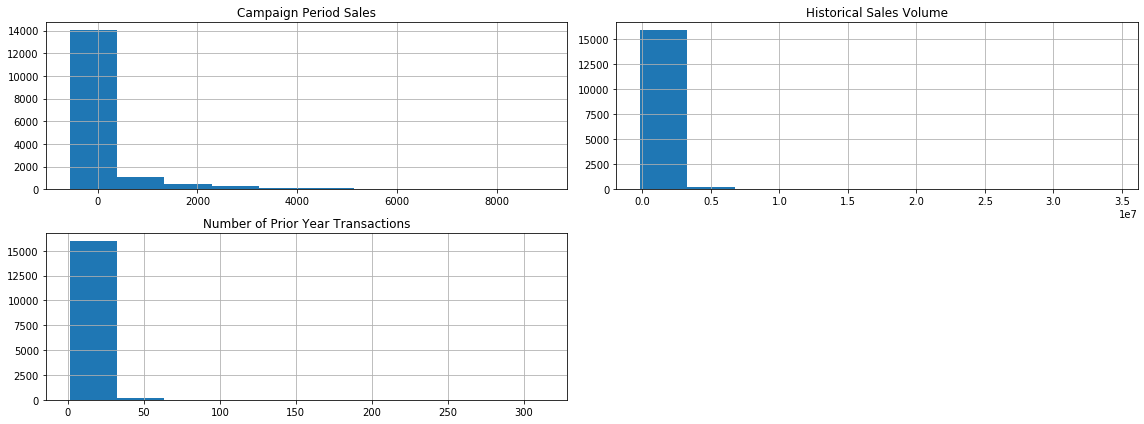

In [73]:
clean_data[["Campaign Period Sales","Historical Sales Volume","Number of Prior Year Transactions"]].hist(figsize=(16,6))
plt.tight_layout()

In [74]:
clean_data[["Campaign Period Sales","Historical Sales Volume","Number of Prior Year Transactions"]].describe()

,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions
count,16168.000000,1.616800e+04,16168.000000
mean,245.751989,6.713433e+05,14.484043
std,720.053152,9.556720e+05,8.030736
min,-566.500000,-1.643031e+05,1.000000
25%,0.000000,1.900188e+05,8.000000
50%,0.000000,3.965039e+05,16.000000
75%,145.538667,7.871561e+05,20.000000
max,8936.850000,3.441213e+07,313.000000


In [75]:
clean_data.loc[clean_data["Campaign Period Sales"]<0] = 0
clean_data.loc[clean_data["Historical Sales Volume"]<0] = 0
clean_data[["Campaign Period Sales","Historical Sales Volume","Number of Prior Year Transactions"]].describe()

,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions
count,16168.000000,1.616800e+04,16168.000000
mean,245.840071,6.713209e+05,14.475878
std,719.999064,9.556780e+05,8.036521
min,0.000000,0.000000e+00,0.000000
25%,0.000000,1.900134e+05,8.000000
50%,0.000000,3.962959e+05,16.000000
75%,145.538667,7.871561e+05,20.000000
max,8936.850000,3.441213e+07,313.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002412DA16908>,
      dtype=object)

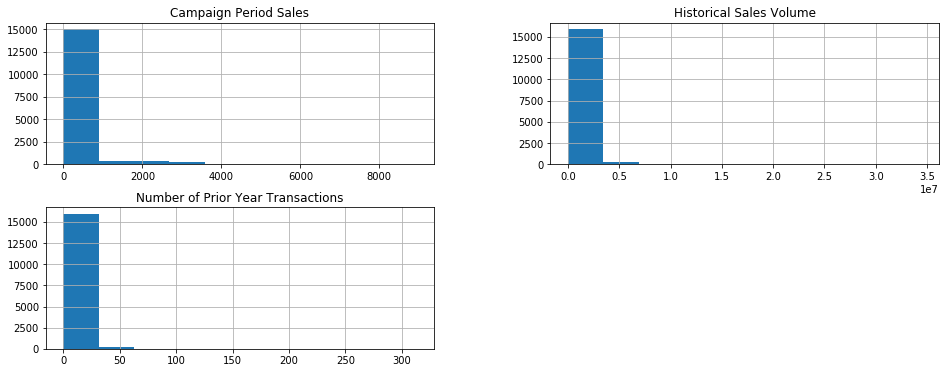

In [76]:
clean_data[["Campaign Period Sales","Historical Sales Volume","Number of Prior Year Transactions"]].hist(figsize=(16,6))


In [78]:
clean_data.to_csv("Cleaned office supply data.csv")